### Dataset Information 



The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Data Preprocessing & EDA

### Attaching Resources

### Importing Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [4]:
cc = pd.read_csv('creditcard.csv')

cc

Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
14477  25641  1.425674 -1.259780  0.884029 -1.362242 -2.033192 -0.631160   
14478  25644  1.316598 -0.826446  1.251612 -0.563997 -1.715165 -0.309792   
14479  25646 -1.048016  0.771842  1.237414 -0.677479  1.093421  0.838917   
14480  25647  1.154433 -0.269621 -0.099724 -0.336083 -0.347739 -0.593915   
14481  25649  1.321778 -0.518235 -0.402296 -1.797533  0.146601  0.603899   

             V7        V8        V9  ...       V21       V22       V23  \
0      0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474   
1     -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288   
2      0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412   
3      0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321   
4      0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458   
...         ...       ...       ...  ...       ...       ...       ...   
14477 -1.450489  0.082439 -1.628057  ... -0.009342  0.255500  0.025141   
14478 -1.308584  0.185198 -0.260791  ...  0.359044  1.059370 -0.073967   
14479  0.411902  0.440377 -0.227063  ... -0.049759 -0.197853  0.080868   
14480  0.008028  0.011338 -0.006543  ... -0.008113 -0.175138 -0.018690   
14481 -0.377949  0.207089  1.550105  ... -0.313435 -0.645457 -0.171960   

            V24       V25       V26       V27       V28  Amount  Class  
0      0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1     -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2     -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3     -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4      0.141267 -0.206010  0.502292  0.219422  0.215153   69.99      0  
...         ...       ...       ...       ...       ...     ...    ...  
14477  0.496865  0.226466 -0.129247  0.036433  0.017130   19.80      0  
14478  0.580465  0.378757 -0.073548  0.043336  0.014494    1.25      0  
14479 -1.035154 -0.711661 -0.008360 -0.129441  0.136384    3.58      0  
14480  0.073488  0.179631  1.402176 -0.135195 -0.018767   49.90      0  
14481 -1.667618  0.594868 -0.071091  0.026150 -0.014763    9.88      0  

[14482 rows x 31 columns]

In [5]:
cc_nrow = cc.shape[0]

In [6]:
def lost_record():

    cc_nrow_now = cc.shape[0]
    lost = cc_nrow - cc_nrow_now
    lost = (lost/cc_nrow)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + ' % data')


## Performing EDA In Dataset

### Performing Data Preprocessing

#### Applying Descriptive Statistics

In [7]:
cc.describe()

Time            V1            V2            V3            V4  \
count  14482.000000  14482.000000  14482.000000  14482.000000  14482.000000   
mean   10672.748584     -0.236355      0.282729      0.836550      0.303943   
std     8109.317328      1.734944      1.402232      1.583896      1.497425   
min        0.000000    -27.670569    -34.607649    -24.667741     -4.657545   
25%     3096.000000     -0.971103     -0.286710      0.399219     -0.623613   
50%     9560.000000     -0.317928      0.251922      0.955198      0.225274   
75%    18594.000000      1.162667      0.884650      1.599429      1.192543   
max    25649.000000      1.960497     10.819665      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  14482.000000  14482.000000  14482.000000  14482.000000  14482.000000   
mean      -0.120888      0.128402     -0.158787     -0.014119      0.966558   
std        1.300417      1.324177      1.248184      1.266082      1.222993   
min      -32.092129    -23.496714    -26.548144    -23.632502     -7.175097   
25%       -0.717204     -0.626509     -0.614472     -0.182962      0.253929   
50%       -0.190311     -0.147979     -0.109592      0.016750      0.949394   
75%        0.351017      0.508376      0.419053      0.265331      1.635216   
max       34.099309     21.393069     34.303177     11.580797     10.392889   

       ...           V21           V22           V23           V24  \
count  ...  14482.000000  14482.000000  14482.000000  14482.000000   
mean   ...     -0.067598     -0.159260     -0.034966      0.011983   
std    ...      0.870829      0.622275      0.495593      0.587360   
min    ...    -11.468435     -8.593642    -19.254328     -2.512377   
25%    ...     -0.272545     -0.553495     -0.173093     -0.339285   
50%    ...     -0.131545     -0.123806     -0.044647      0.060469   
75%    ...      0.020505      0.228997      0.070794      0.393048   
max    ...     22.614889      4.534454     13.876221      3.200201   

                V25           V26           V27           V28        Amount  \
count  14482.000000  14482.000000  14482.000000  14482.000000  14482.000000   
mean       0.117258      0.035584      0.013574      0.003022     64.183097   
std        0.429308      0.554666      0.397728      0.254389    177.377536   
min       -4.781606     -1.338556     -7.976100     -3.575312      0.000000   
25%       -0.136529     -0.369970     -0.075885     -0.014378      5.490000   
50%        0.156892     -0.034448     -0.000669      0.016518     15.860000   
75%        0.393032      0.369873      0.097888      0.073205     52.900000   
max        5.525093      3.517346      8.254376      4.860769   7712.430000   

              Class  
count  14482.000000  
mean       0.004212  
std        0.064766  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 31 columns]

#### Performing Typecasting

In [8]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14482 entries, 0 to 14481
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    14482 non-null  int64  
 1   V1      14482 non-null  float64
 2   V2      14482 non-null  float64
 3   V3      14482 non-null  float64
 4   V4      14482 non-null  float64
 5   V5      14482 non-null  float64
 6   V6      14482 non-null  float64
 7   V7      14482 non-null  float64
 8   V8      14482 non-null  float64
 9   V9      14482 non-null  float64
 10  V10     14482 non-null  float64
 11  V11     14482 non-null  float64
 12  V12     14482 non-null  float64
 13  V13     14482 non-null  float64
 14  V14     14482 non-null  float64
 15  V15     14482 non-null  float64
 16  V16     14482 non-null  float64
 17  V17     14482 non-null  float64
 18  V18     14482 non-null  float64
 19  V19     14482 non-null  float64
 20  V20     14482 non-null  float64
 21  V21     14482 non-null  float64
 22

#### Performing Missing Value Imputation

In [9]:
def missing_percentage(cc):

    m = cc.isna().sum()
    total = int(cc.shape[0])

    for i in range(len(cc.columns)):
        percentage =round((m[i]/total)*100)

        print(str(cc.columns[i]) + ' has ' + str(percentage) + ' % missing value(' + str(m[i]) + ')')

##### Missing Value Percentage

In [10]:
missing_percentage(cc)

Time has 0 % missing value(0)
V1 has 0 % missing value(0)
V2 has 0 % missing value(0)
V3 has 0 % missing value(0)
V4 has 0 % missing value(0)
V5 has 0 % missing value(0)
V6 has 0 % missing value(0)
V7 has 0 % missing value(0)
V8 has 0 % missing value(0)
V9 has 0 % missing value(0)
V10 has 0 % missing value(0)
V11 has 0 % missing value(0)
V12 has 0 % missing value(0)
V13 has 0 % missing value(0)
V14 has 0 % missing value(0)
V15 has 0 % missing value(0)
V16 has 0 % missing value(0)
V17 has 0 % missing value(0)
V18 has 0 % missing value(0)
V19 has 0 % missing value(0)
V20 has 0 % missing value(0)
V21 has 0 % missing value(0)
V22 has 0 % missing value(0)
V23 has 0 % missing value(0)
V24 has 0 % missing value(0)
V25 has 0 % missing value(0)
V26 has 0 % missing value(0)
V27 has 0 % missing value(0)
V28 has 0 % missing value(0)
Amount has 0 % missing value(0)
Class has 0 % missing value(0)


#### Finding Unique Values In Dataset

In [11]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
              str(len(df[df.columns[i]].unique())))


In [12]:
uni(cc)


 All Unique Value in Time
[    0     1     2 ... 25646 25647 25649]
Total no of unique values 9875

 All Unique Value in V1
[-27.67056888 -23.06684166 -18.020508   ...   1.62853236   1.68531381
   1.96049657]
Total no of unique values 14015

 All Unique Value in V2
[-34.60764864 -25.93613668 -25.64052693 ...  10.5417508   10.55860019
  10.81966537]
Total no of unique values 14015

 All Unique Value in V3
[-24.66774125 -24.20214223 -23.73644341 ...   4.02942832   4.07916781
   4.10171618]
Total no of unique values 14015

 All Unique Value in V4
[-4.65754503 -4.57354047 -4.51582436 ... 11.88531289 11.90616991
 11.92751187]
Total no of unique values 14015

 All Unique Value in V5
[-32.092129   -13.46503335 -13.02590105 ...  11.97426887  24.36353177
  34.09930934]
Total no of unique values 14015

 All Unique Value in V6
[-23.49671393 -16.10717824  -7.57479817 ...   7.88572054  10.03392286
  21.39306876]
Total no of unique values 14015

 All Unique Value in V7
[-26.54814377 -21.92281103 -1

### Checking for Duplicated Values

In [13]:
cc[cc.duplicated()].shape[0]

53

In [14]:
cc.drop_duplicates(inplace = True)

In [15]:
lost_record()

We lost 0.37 % data


In [16]:
cc[cc.duplicated()]

Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]

- There is no duplicate value in are dataset

### Reindexing Columns


In [17]:
cc.reset_index(inplace=True)
cc.drop(columns=['index'], inplace=True)

cc

Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
14424  25641  1.425674 -1.259780  0.884029 -1.362242 -2.033192 -0.631160   
14425  25644  1.316598 -0.826446  1.251612 -0.563997 -1.715165 -0.309792   
14426  25646 -1.048016  0.771842  1.237414 -0.677479  1.093421  0.838917   
14427  25647  1.154433 -0.269621 -0.099724 -0.336083 -0.347739 -0.593915   
14428  25649  1.321778 -0.518235 -0.402296 -1.797533  0.146601  0.603899   

             V7        V8        V9  ...       V21       V22       V23  \
0      0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474   
1     -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288   
2      0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412   
3      0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321   
4      0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458   
...         ...       ...       ...  ...       ...       ...       ...   
14424 -1.450489  0.082439 -1.628057  ... -0.009342  0.255500  0.025141   
14425 -1.308584  0.185198 -0.260791  ...  0.359044  1.059370 -0.073967   
14426  0.411902  0.440377 -0.227063  ... -0.049759 -0.197853  0.080868   
14427  0.008028  0.011338 -0.006543  ... -0.008113 -0.175138 -0.018690   
14428 -0.377949  0.207089  1.550105  ... -0.313435 -0.645457 -0.171960   

            V24       V25       V26       V27       V28  Amount  Class  
0      0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1     -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2     -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3     -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4      0.141267 -0.206010  0.502292  0.219422  0.215153   69.99      0  
...         ...       ...       ...       ...       ...     ...    ...  
14424  0.496865  0.226466 -0.129247  0.036433  0.017130   19.80      0  
14425  0.580465  0.378757 -0.073548  0.043336  0.014494    1.25      0  
14426 -1.035154 -0.711661 -0.008360 -0.129441  0.136384    3.58      0  
14427  0.073488  0.179631  1.402176 -0.135195 -0.018767   49.90      0  
14428 -1.667618  0.594868 -0.071091  0.026150 -0.014763    9.88      0  

[14429 rows x 31 columns]

### Visualizing The Data 

### Distribution in the Class column

<Axes: title={'center': 'Distribution of the Class columns'}, ylabel='count'>

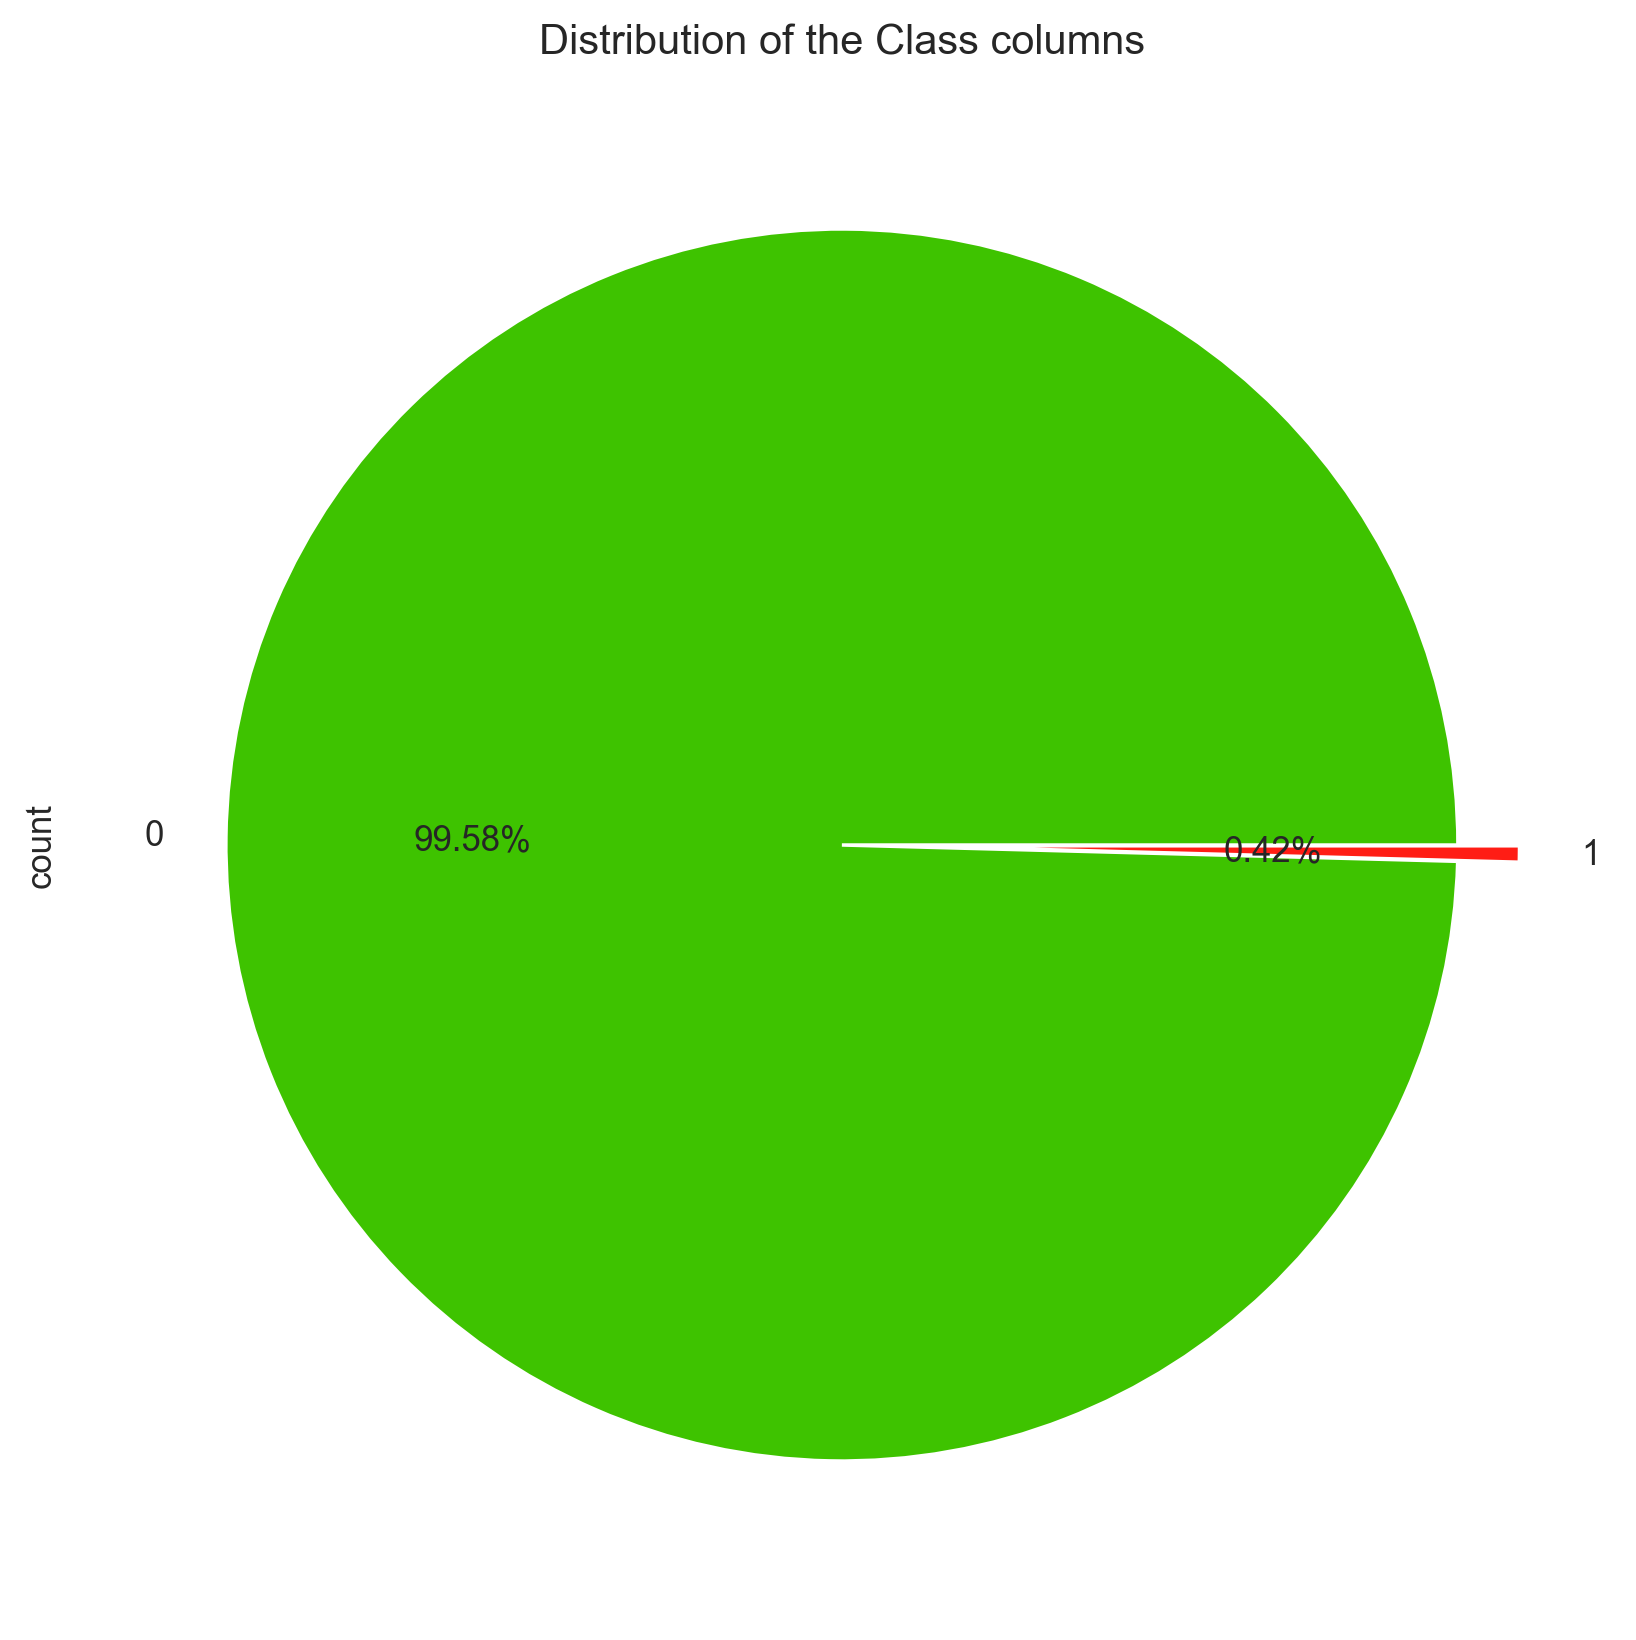

In [18]:
plt.title('Distribution of the Class columns')
explode = (0, 0.1)
cc['Class'].value_counts().plot(kind='pie', autopct = '%.2f%%',
            explode = explode, colors=['#3ec300', '#ff1d15'])

### Average transaction amount for each class (fraudulent and non-fraudulent)

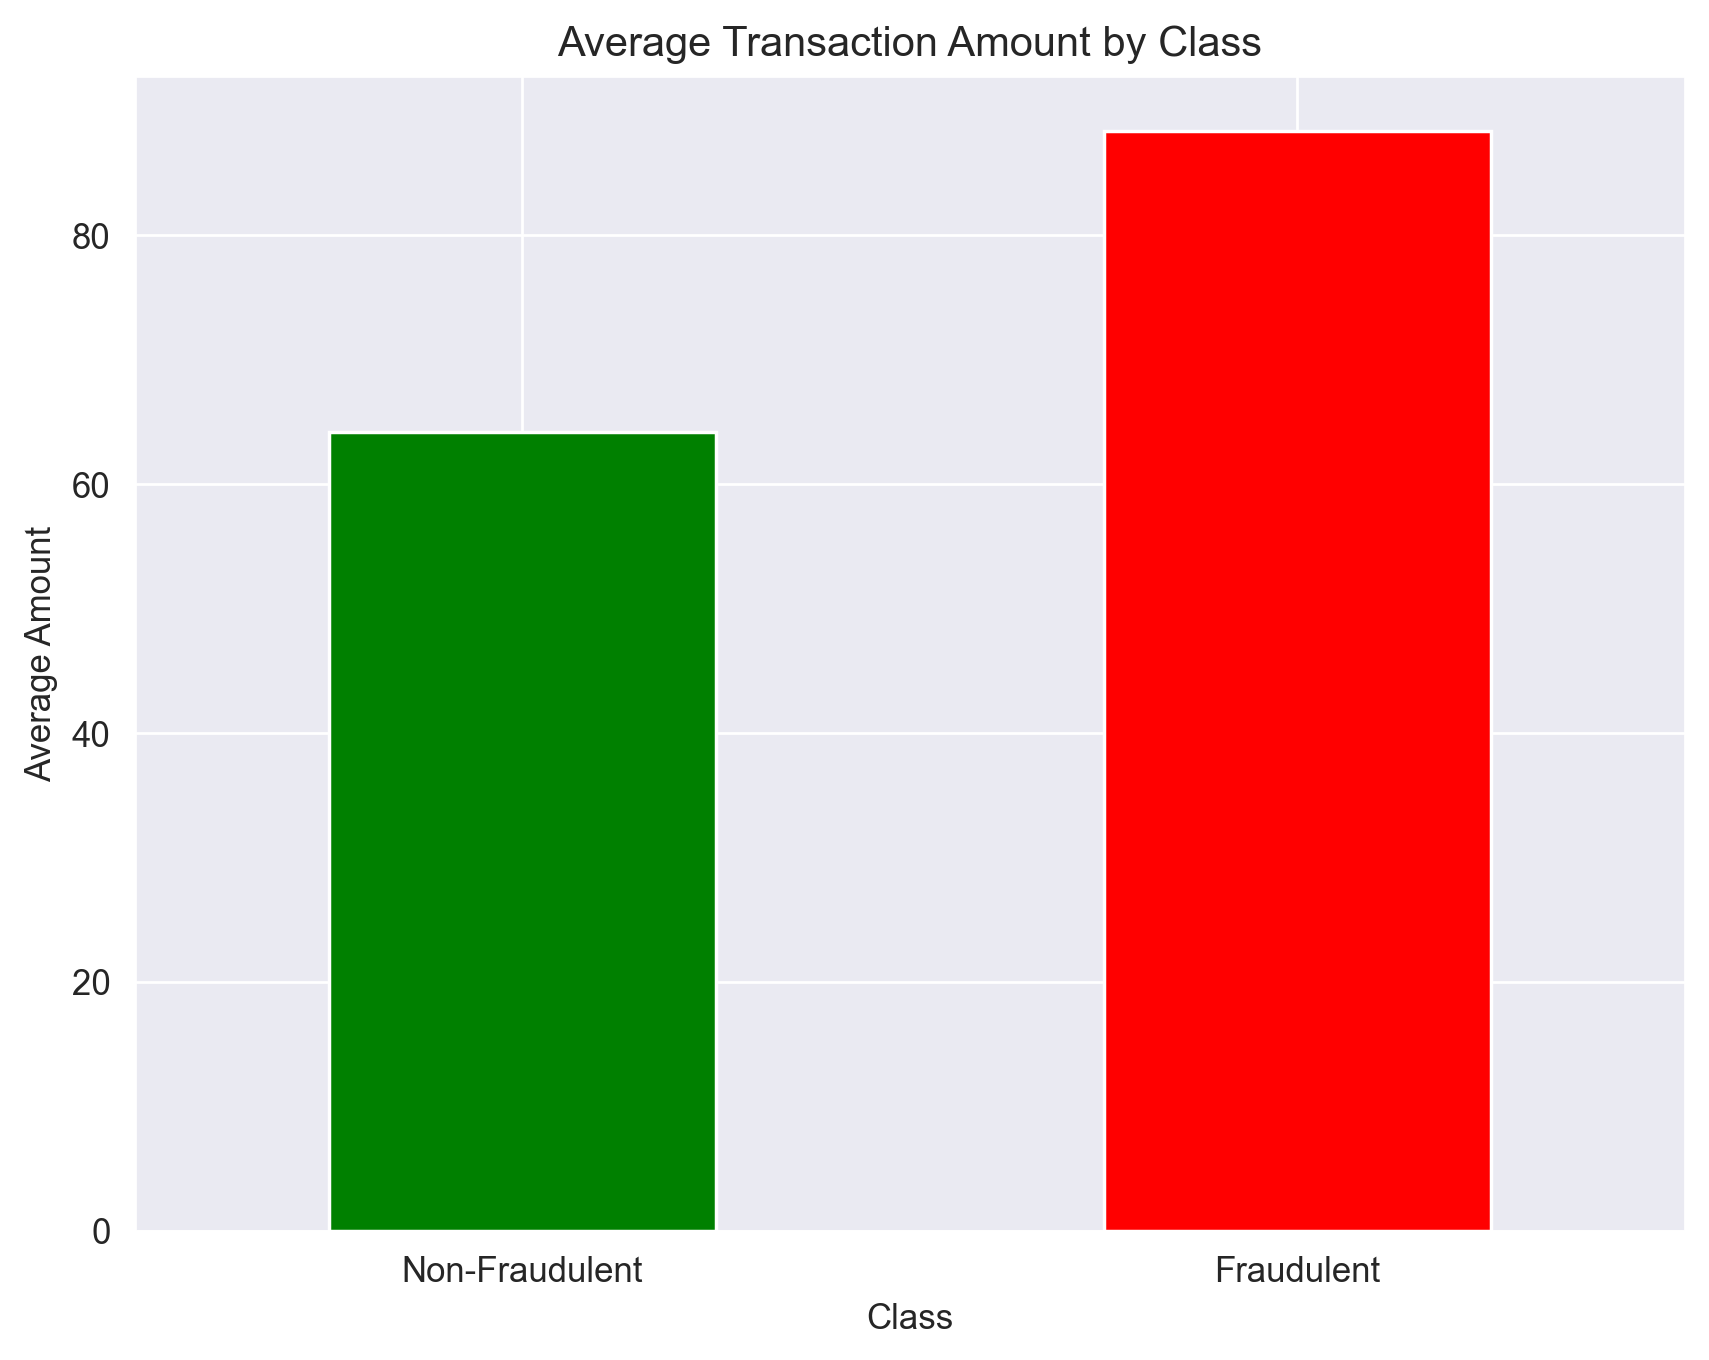

In [19]:
plt.figure(figsize=(8, 6))
cc.groupby('Class')['Amount'].mean().plot(kind='bar', color=['green', 'red'])
plt.title('Average Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Average Amount')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'], rotation=0)
plt.show()

### Distribution of transaction Times and Amount

<Axes: title={'center': 'Distribution of Transaction Amount'}, xlabel='Amount', ylabel='Density'>

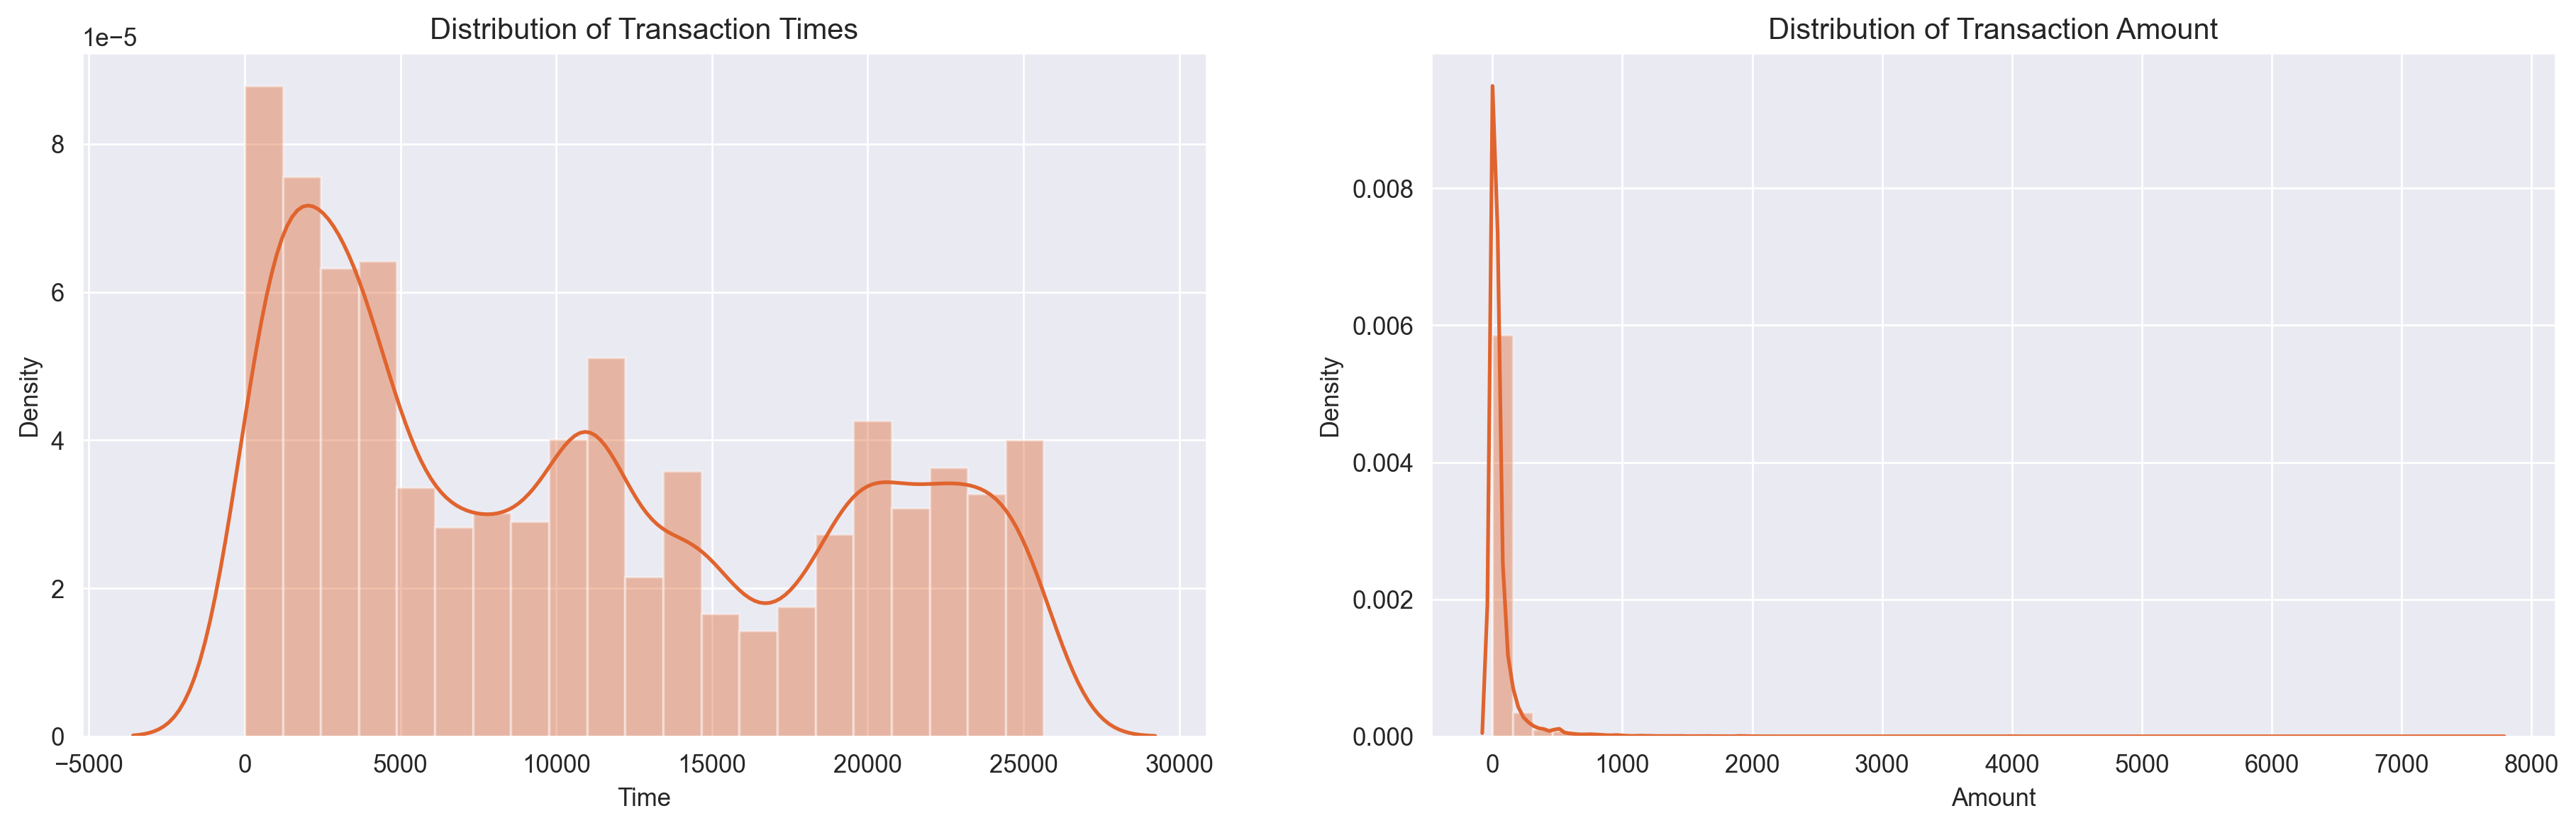

In [20]:
fig, ax = plt.subplots(ncols = 2, figsize = [18,5])

plt.setp(ax[0], title = 'Distribution of Transaction Times')
sns.distplot(cc['Time'], ax = ax[0], color = '#E0642E')

plt.setp(ax[1], title = 'Distribution of Transaction Amount')
sns.distplot(cc['Amount'], ax = ax[1], color = '#E0642E')


### Distribution of each of the 'V1' to 'V28' features

In [21]:
df_temp = cc.drop(columns=['Time', 'Amount', 'Class'], axis=1)

fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

### Coorelation Matrix

<Axes: >

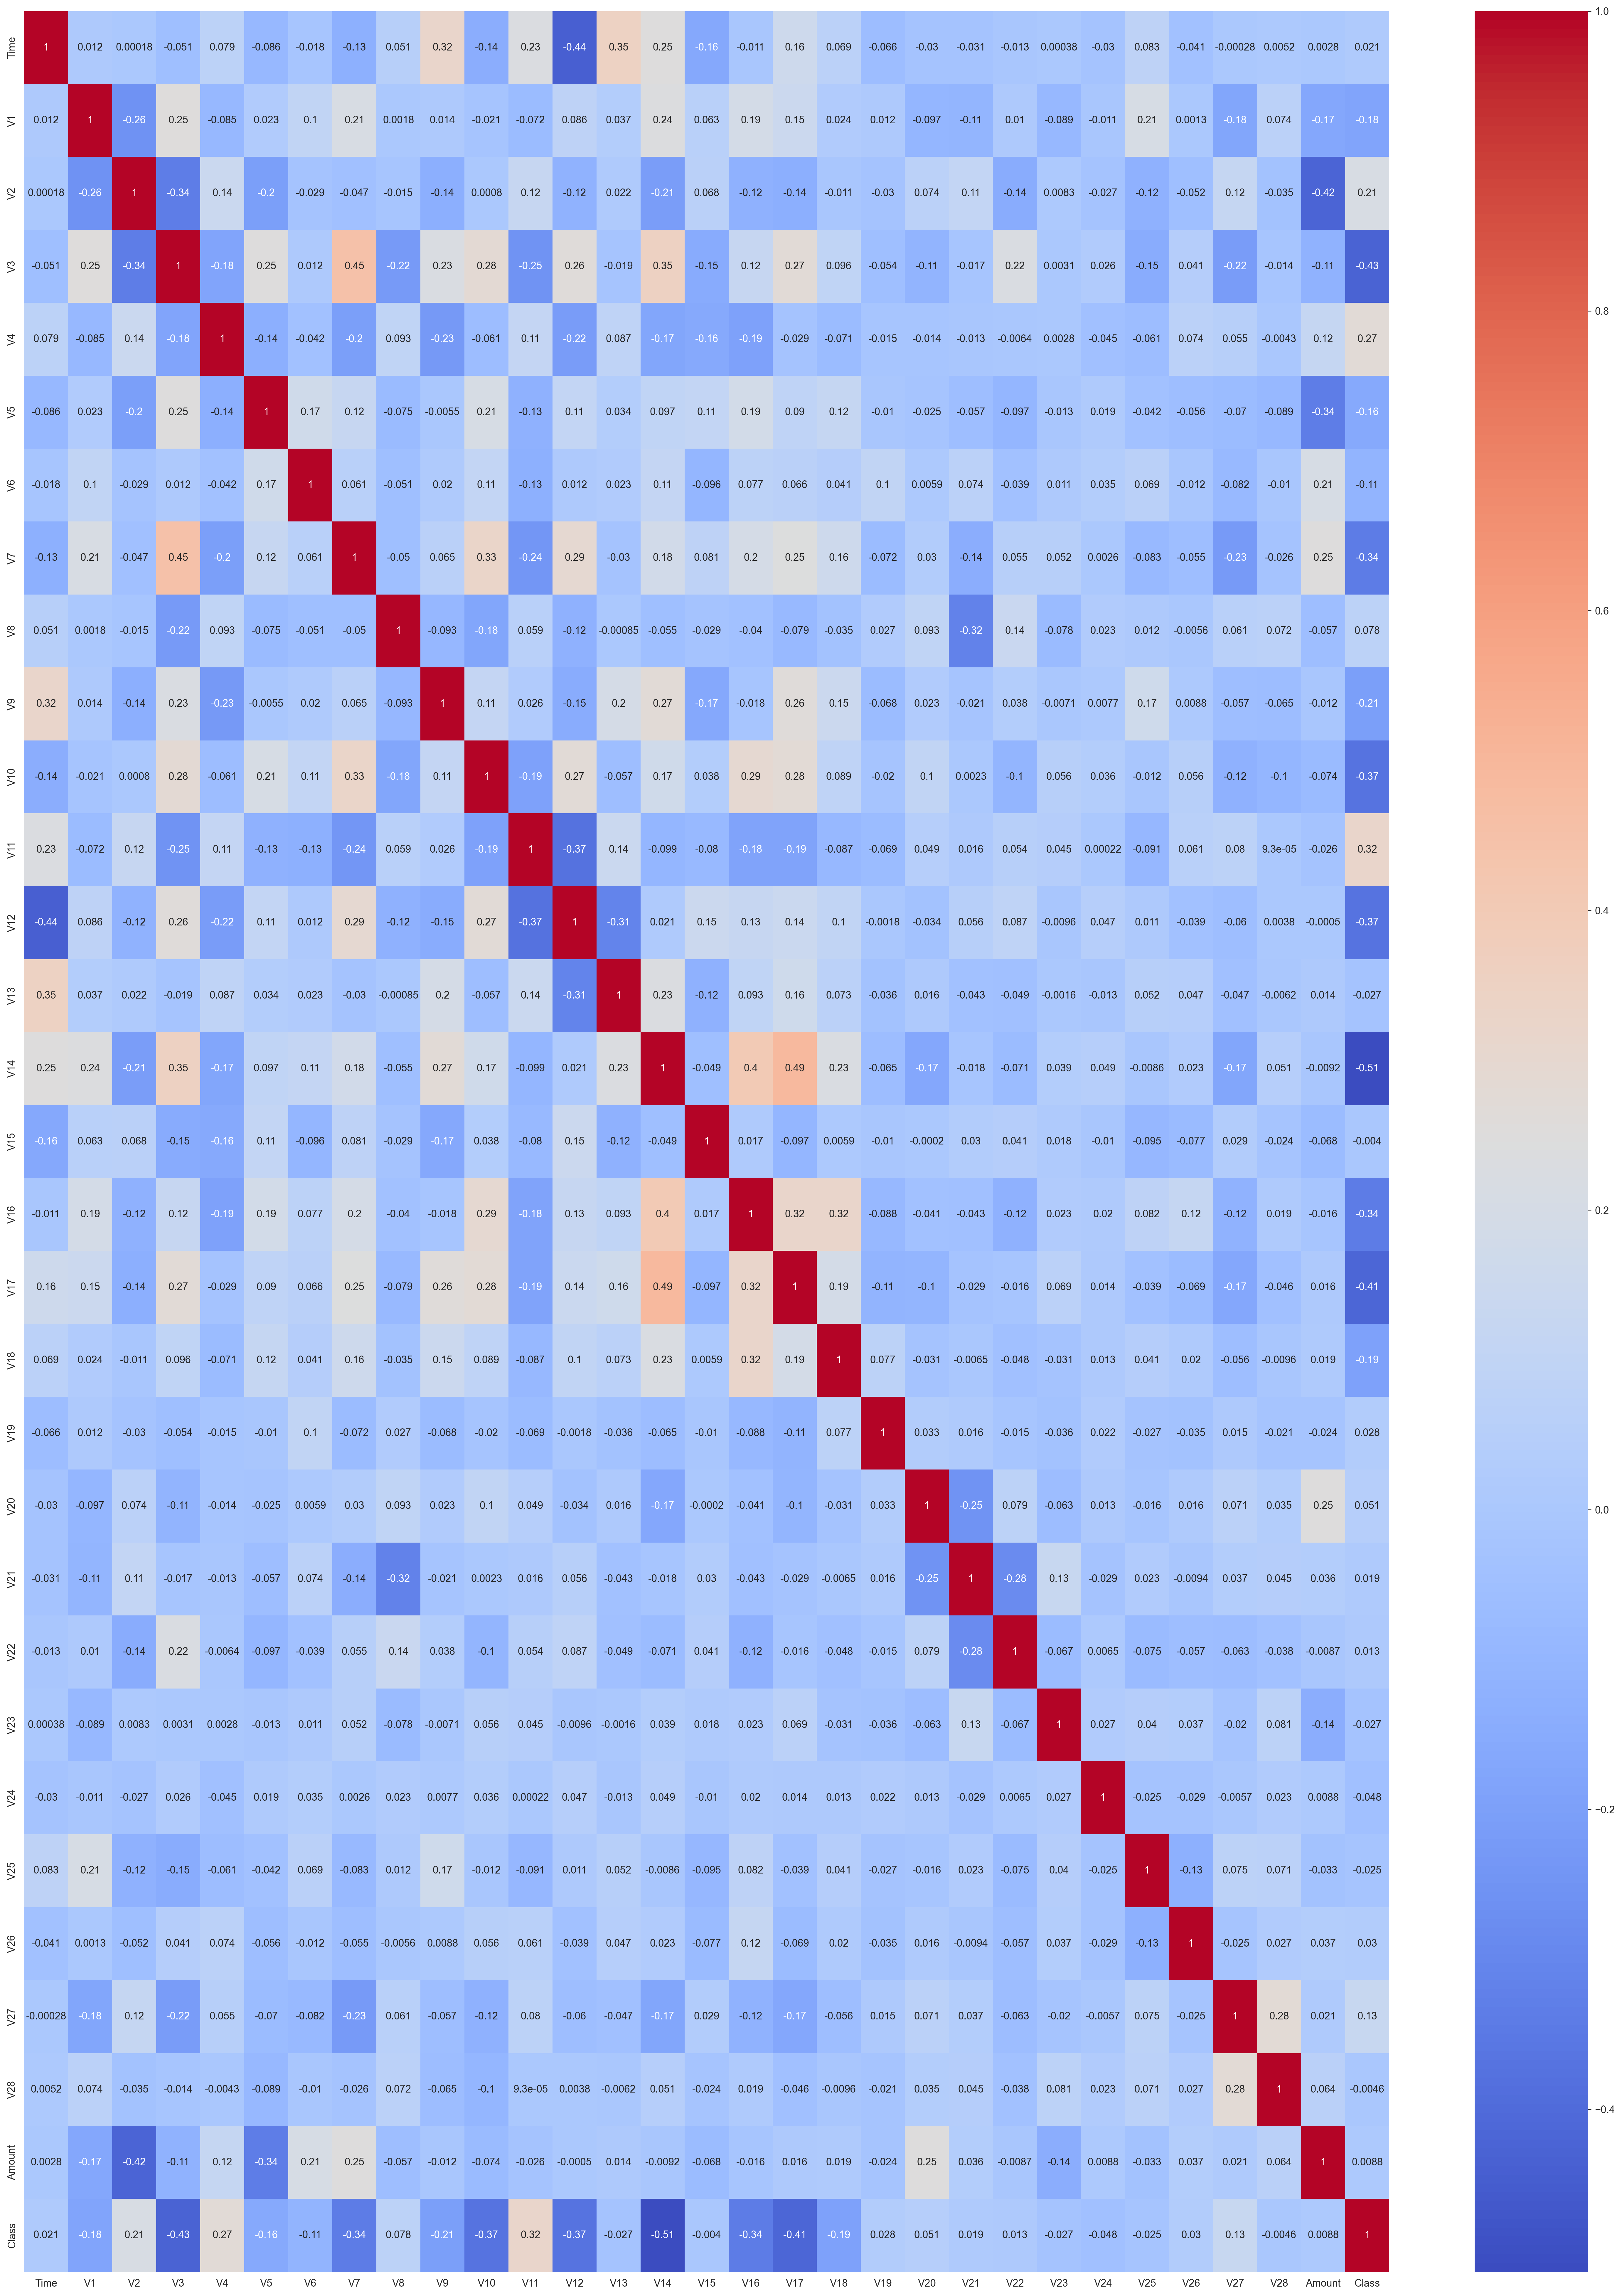

In [22]:
corr = cc.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [23]:
cc.to_csv('EDA.csv', index=False)